In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Navdeep\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Navdeep\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Navdeep\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
april = pd.read_csv('Uber-dataset/uber-raw-data-apr14.csv')
may = pd.read_csv('Uber-dataset/uber-raw-data-may14.csv')
jun = pd.read_csv('Uber-dataset/uber-raw-data-jun14.csv')
jul = pd.read_csv('Uber-dataset/uber-raw-data-jul14.csv')
aug = pd.read_csv('Uber-dataset/uber-raw-data-aug14.csv')
sep = pd.read_csv('Uber-dataset/uber-raw-data-sep14.csv')

In [3]:
df = pd.concat([april, may, jun, jul, aug, sep])

In [4]:
df.shape

(4534327, 4)

In [5]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [7]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [8]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [9]:
df['Date/Time'].unique().shape

(260093,)

In [10]:
df.duplicated().sum()

82581

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(4451746, 4)

In [12]:
import seaborn as sns
sns.set()

In [13]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


<AxesSubplot:xlabel='Base'>

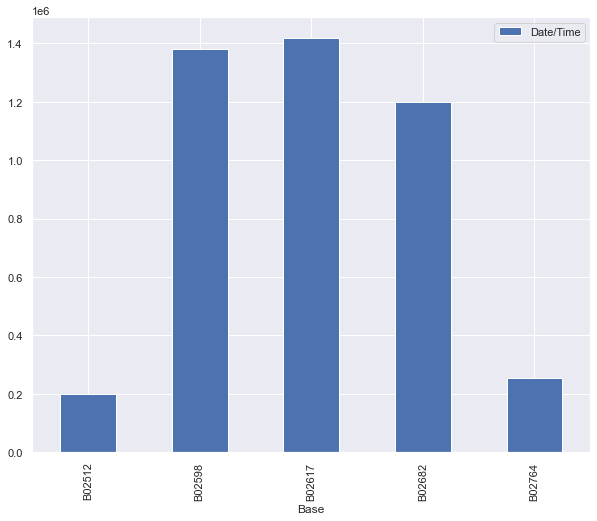

In [14]:
df.groupby('Base').agg({'Date/Time': 'count'}).plot(kind='bar', figsize=(10, 8))

In [15]:
df.describe()

,Lat,Lon
count,4.451746e+06,4.451746e+06
mean,4.073924e+01,-7.397304e+01
std,3.984343e-02,5.721967e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


(40.0, 41.2)

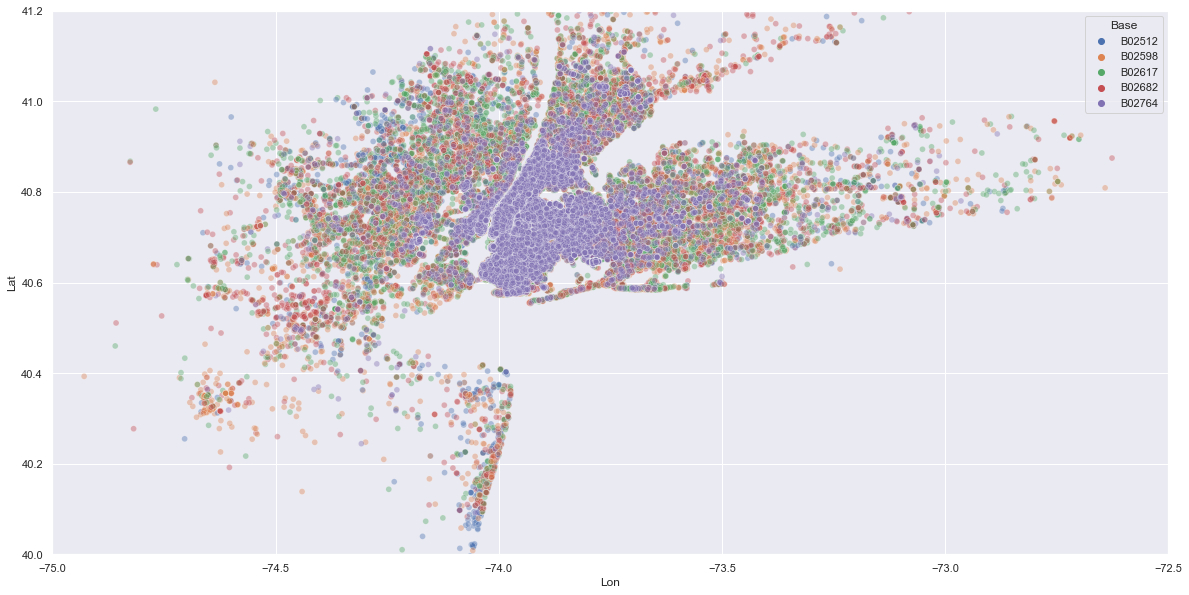

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,y='Lat',x='Lon',alpha=0.4,hue='Base')
plt.xlim(-75,-72.5)
plt.ylim(40.0,41.2)

In [17]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [18]:
# replace Base with 0-4
df['Base_id'] = df['Base'].replace(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], [0, 1, 2, 3, 4])

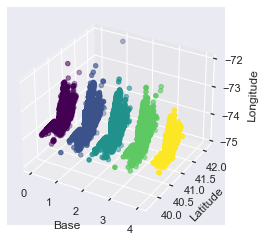

<Figure size 1080x1296 with 0 Axes>

In [19]:
# 3d plot matplotlib
fig = plt.figure()
plt.figure(figsize=(15, 18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Base_id'],df['Lat'], df['Lon'], c=df['Base_id'], cmap='viridis', marker='o')
ax.set_xlabel('Base')
ax.set_ylabel('Latitude')
ax.set_zlabel('Longitude')
plt.show()

In [20]:
df['month'] = df['Date/Time'].dt.month
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute
df['Date'] = df['Date/Time'].dt.date

In [21]:
df.head()

,Date/Time,Lat,Lon,Base,Base_id,month,weekday,day,hour,minute,Date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,4,Tuesday,1,0,11,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,4,Tuesday,1,0,17,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,4,Tuesday,1,0,21,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,4,Tuesday,1,0,28,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,4,Tuesday,1,0,33,2014-04-01


<AxesSubplot:xlabel='weekday', ylabel='count'>

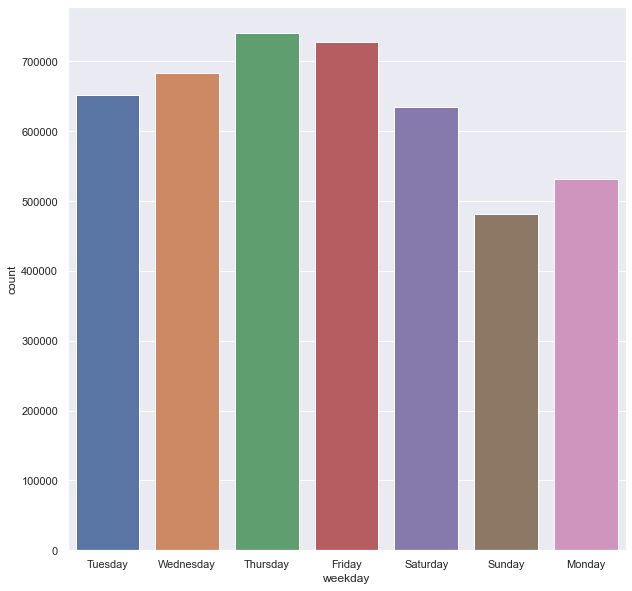

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='weekday')

In [23]:
df['weekday'].value_counts()

Thursday     741372
Friday       727532
Wednesday    683604
Tuesday      651753
Saturday     634194
Monday       532133
Sunday       481158
Name: weekday, dtype: int64

In [24]:
df['month'].value_counts()

9    1004099
8     813393
7     781969
6     653158
5     642360
4     556767
Name: month, dtype: int64

In [25]:
df.groupby('month')['hour'].count()

month
4     556767
5     642360
6     653158
7     781969
8     813393
9    1004099
Name: hour, dtype: int64

In [26]:
df.groupby('day')['hour'].count()

day
1     125282
2     140767
3     140688
4     138361
5     144547
6     137313
7     140983
8     143530
9     152500
10    149715
11    146135
12    157725
13    153991
14    137656
15    150892
16    156020
17    149828
18    148509
19    150226
20    141363
21    138593
22    144160
23    152976
24    141528
25    149783
26    150403
27    142815
28    138413
29    146267
30    164040
31     76737
Name: hour, dtype: int64

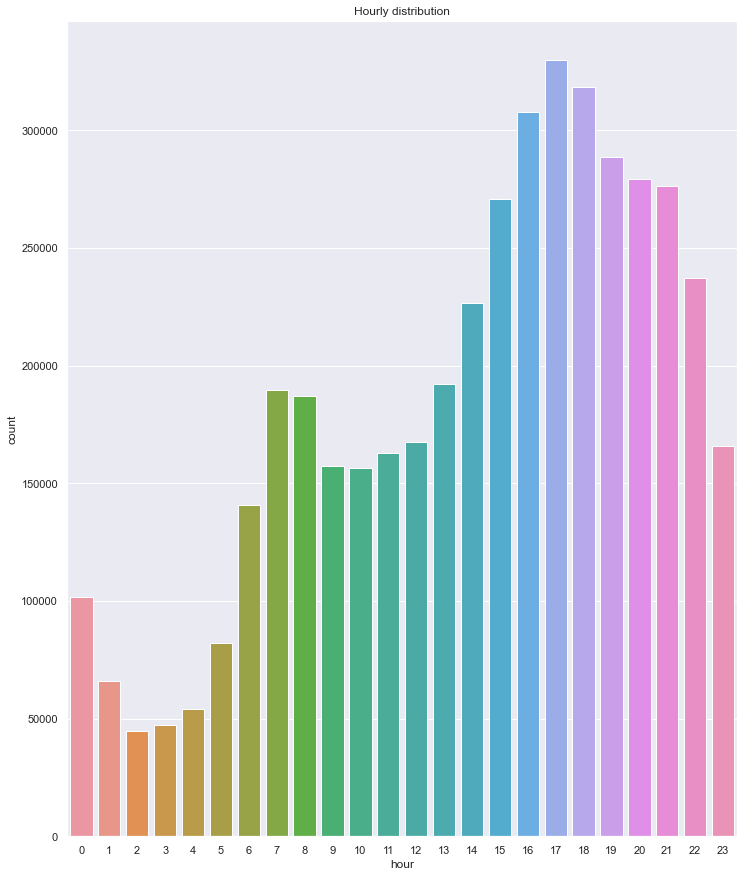

In [64]:
plt.figure(figsize=(12,15))
sns.countplot(x=df['hour'])
plt.title('Hourly distribution')
plt.show()

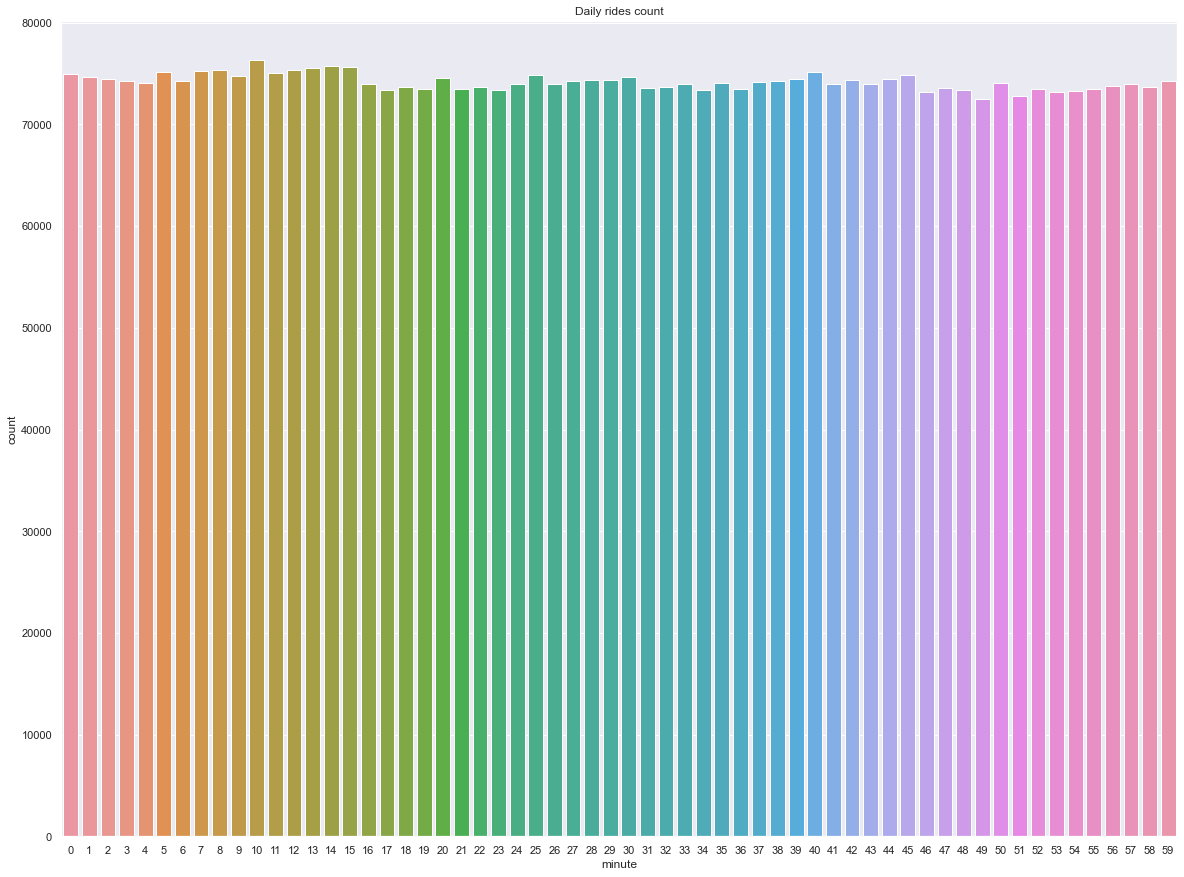

In [62]:
plt.figure(figsize=(20,15))
sns.countplot(x = df['minute'])
plt.title('Daily rides count')
plt.show()

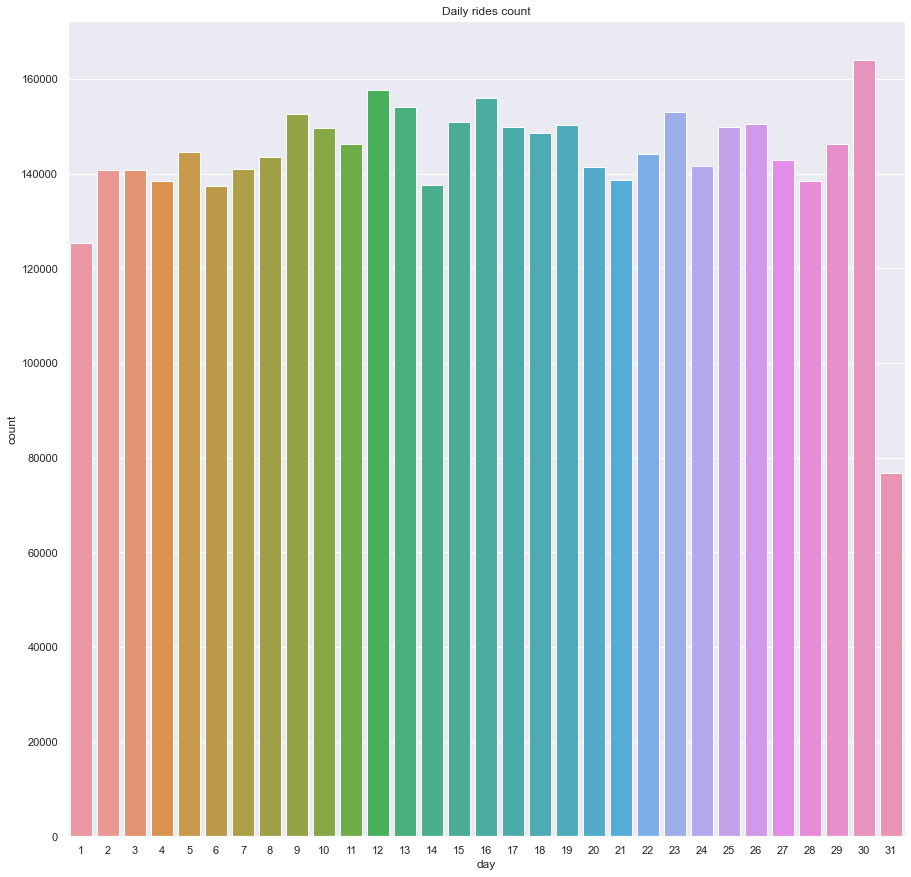

In [63]:
plt.figure(figsize=(15,15))
sns.countplot(x = df['day'])
plt.title('Daily rides count')
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

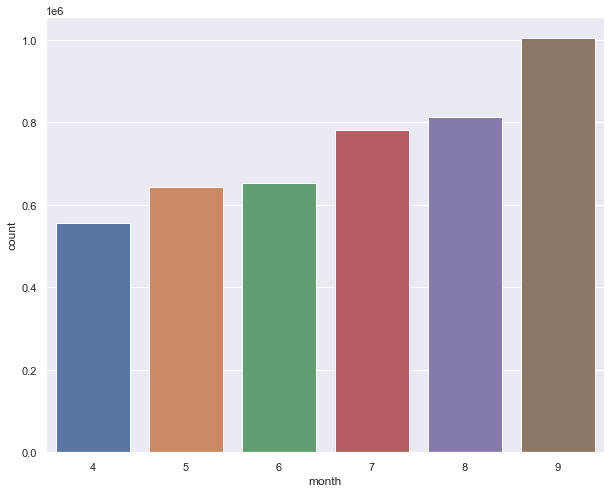

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='month')

Text(0, 0.5, 'Number of rides')

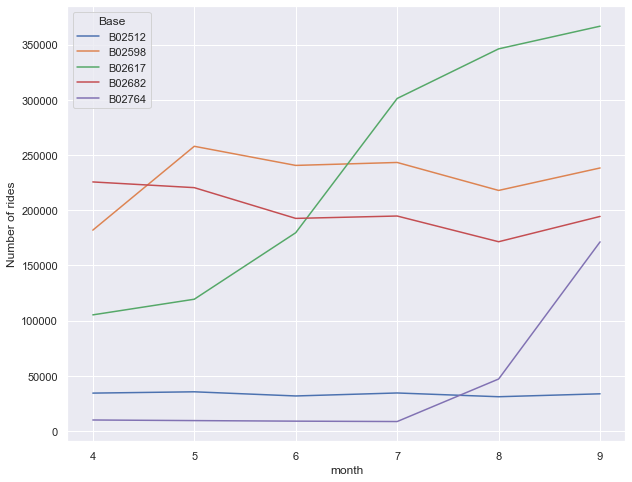

In [31]:
base = df.groupby(['Base','month'])['Date/Time'].count().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=base,x='month',y='Date/Time',hue='Base')
plt.ylabel('Number of rides')

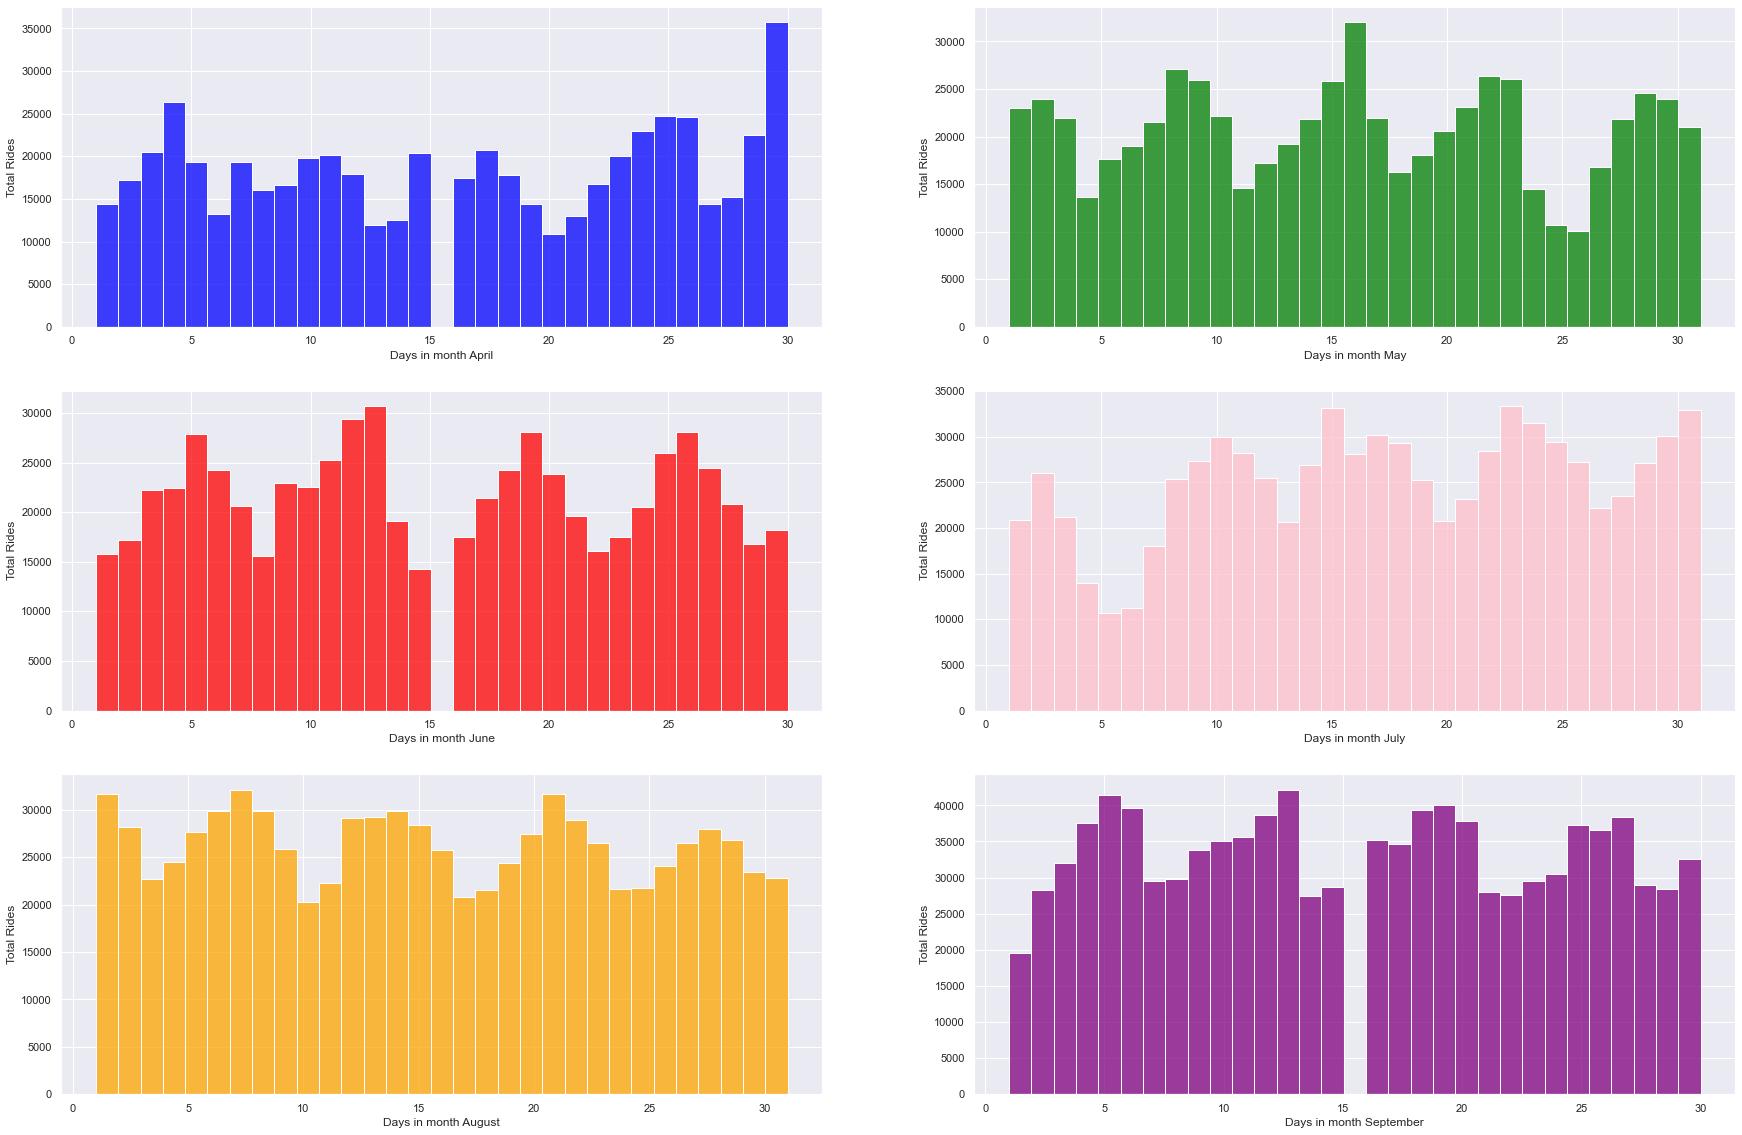

In [32]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
sns.histplot(data=df,x=df[df['month'] == 4]['day'],bins=31,color='blue')
plt.xlabel('Days in month April')
plt.ylabel('Total Rides')
plt.subplot(3,2,2)
sns.histplot(data=df,x=df[df['month'] == 5]['day'],bins=31,color='green')
plt.xlabel('Days in month May')
plt.ylabel('Total Rides')
plt.subplot(3,2,3)
sns.histplot(data=df,x=df[df['month'] == 6]['day'],bins=31,color='red')
plt.xlabel('Days in month June')
plt.ylabel('Total Rides')
plt.subplot(3,2,4)
sns.histplot(data=df,x=df[df['month'] == 7]['day'],bins=31,color='pink')
plt.xlabel('Days in month July')
plt.ylabel('Total Rides')
plt.subplot(3,2,5)
sns.histplot(data=df,x=df[df['month'] == 8]['day'],bins=31,color='orange')
plt.xlabel('Days in month August')
plt.ylabel('Total Rides')
plt.subplot(3,2,6)
sns.histplot(data=df,x=df[df['month'] == 9]['day'],bins=31,color='purple')
plt.xlabel('Days in month September')   
plt.ylabel('Total Rides')
plt.show()


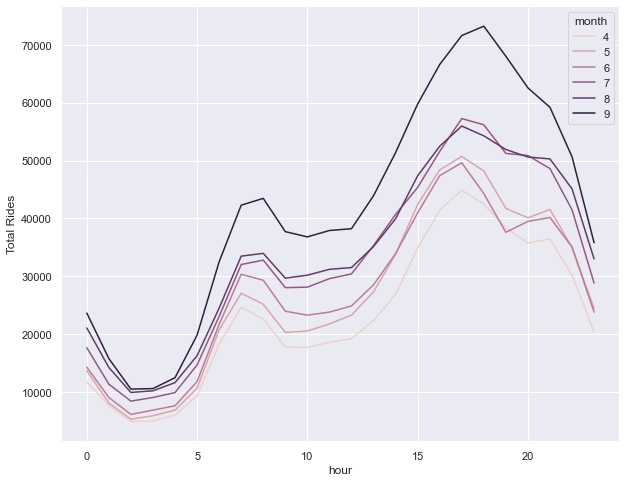

In [33]:
dfx = df.groupby(['month','hour'])['Date/Time'].count().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=dfx,x='hour',y='Date/Time',hue='month')
plt.ylabel('Total Rides')
plt.show()

In [34]:
# average hourly rides
hourly_rides = df.groupby(['month','hour'])['Date/Time'].count().reset_index()
hourly_rides['hourly_rides'] = hourly_rides['Date/Time']/24
hourly_rides.head()

,month,hour,Date/Time,hourly_rides
0,4,0,11716,488.166667
1,4,1,7620,317.500000
2,4,2,4849,202.041667
3,4,3,4938,205.750000
4,4,4,5965,248.541667


Text(0, 0.5, 'Average hourly rides')

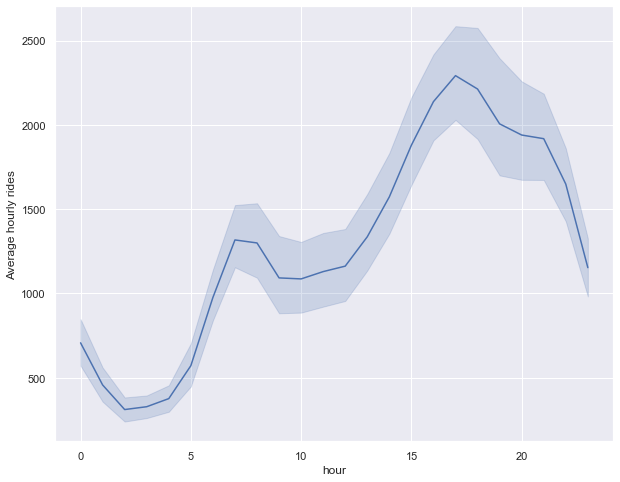

In [35]:
plt.figure(figsize=(10,8))
sns.lineplot(data=hourly_rides,x='hour',y='hourly_rides')
plt.ylabel('Average hourly rides')

Text(0, 0.5, 'Total Rides')

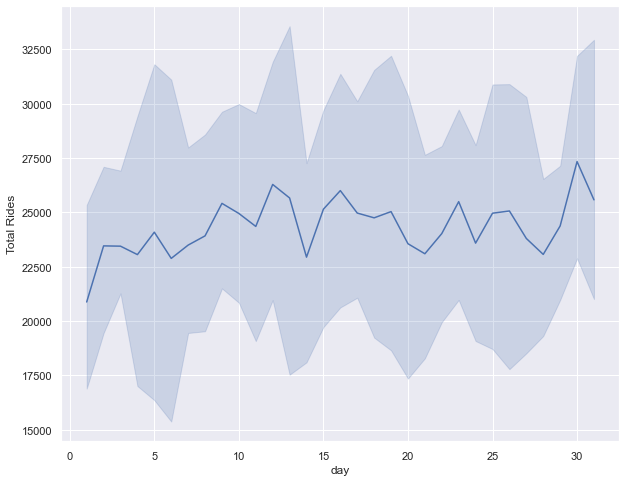

In [36]:
daily_rides_count = df.groupby(['month', 'day'])['Date/Time'].count()
daily_rides_count = daily_rides_count.reset_index()
daily_rides_count.columns = ['month', 'day', 'count']

# plot 
fig = plt.figure(figsize=(10,8))
sns.lineplot(data=daily_rides_count,x='day',y='count')
plt.ylabel('Total Rides')

In [38]:
daily_pickups = df.groupby(['month', 'day'])['hour'].count()
print(f'Busiest Day: {daily_pickups.idxmax()}') 
print(f'Number of pickups: {daily_pickups.max()}')

Busiest Day: (9, 13)
Number of pickups: 42169


In [39]:
weekly_pickups = df.groupby(['weekday', 'day'])['hour'].count()
print(f'Busiest Day: {weekly_pickups.idxmax()}')
print(f'Number of pickups: {weekly_pickups.max()}')

Busiest Day: ('Wednesday', 30)
Number of pickups: 65852


Number of Pickups: 4419110


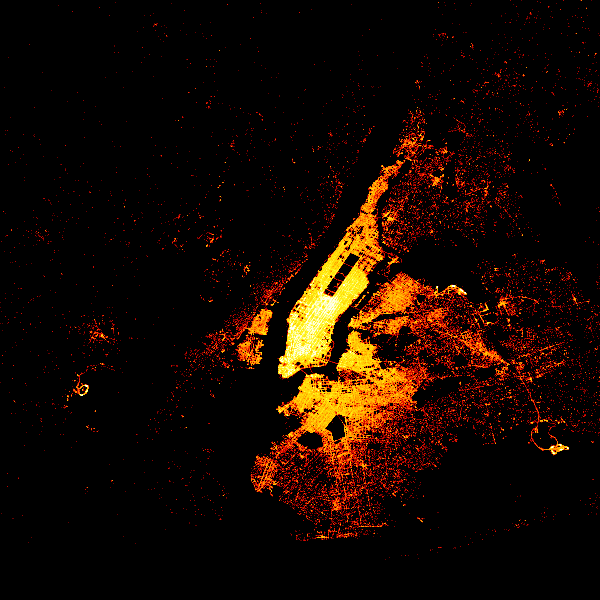

In [40]:
import datashader as ds
import colorcet as cc
focus_on = df[df['Lon'].between(-74.25, -73.75) & df['Lat'].between(40.5, 41)]
print(f'Number of Pickups: {len(focus_on)}')

pickup_points = ds.Canvas().points(focus_on, 'Lon', 'Lat', )
ds.tf.set_background(ds.tf.shade(pickup_points, cmap=cc.fire), "black")

In [41]:
x = df.groupby('Date').count()
test_df = x.copy()
test_df.drop(['Lat','Lon','Date/Time','Base','month','weekday','day','hour','minute'],axis=1,inplace=True)
test_df.columns = ['count']
test_df.head()

,count
Date,
2014-04-01,14376
2014-04-02,17230
2014-04-03,20482
2014-04-04,26353
2014-04-05,19273


In [42]:
0.8*len(test_df)

146.4

In [43]:
train_ts = x[:][:146]
test_ts = x[:][147:]

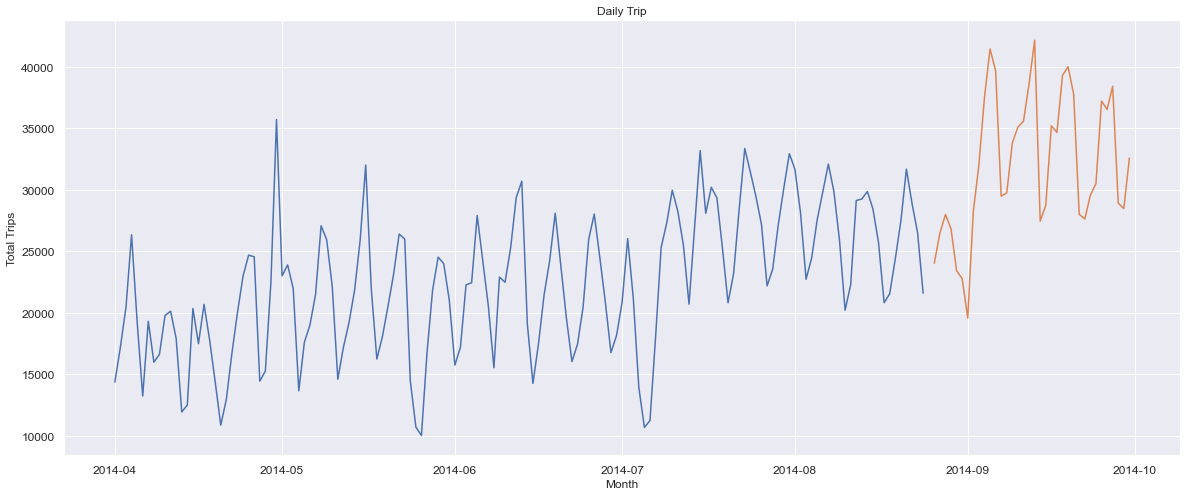

In [61]:
train_ts['Date/Time'].plot(kind='line',figsize=(20,8), title= 'Daily Trip', fontsize=12)
test_ts['Date/Time'].plot(figsize=(20,8), title= 'Daily Trip', fontsize=12)
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.show()

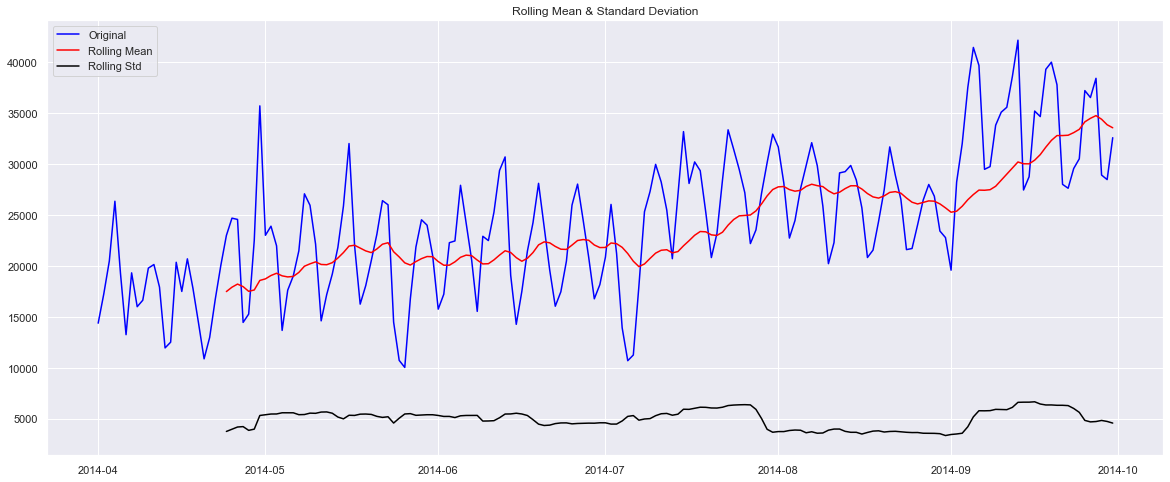

Results of Dickey-Fuller Test:
Test Statistic                  -0.742453
p-value                          0.835445
#Lags Used                      12.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [57]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):    
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()

    plt.figure(figsize=(20,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(test_df['count'])


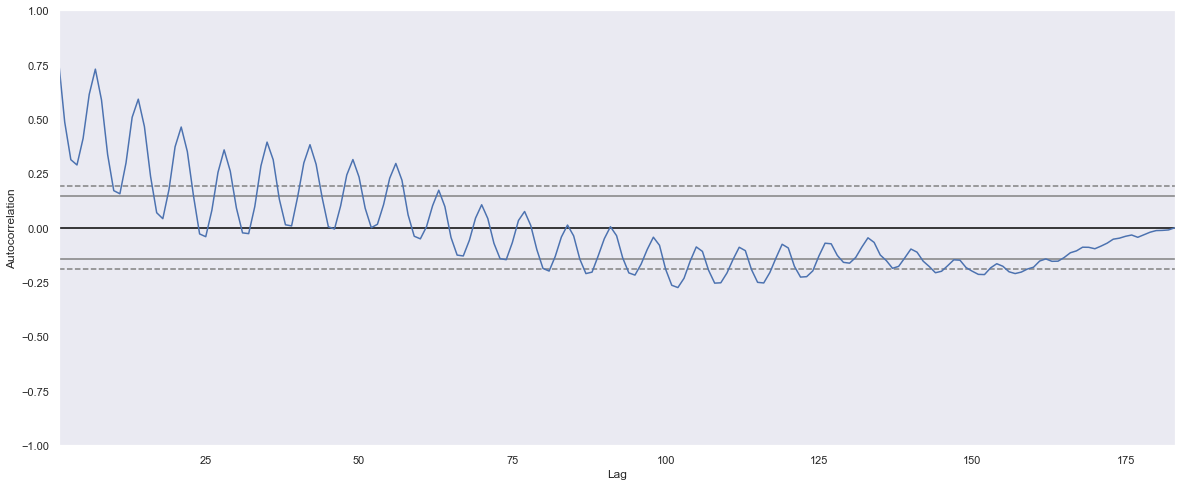

In [54]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,8))
autocorrelation_plot(test_df['count'])
plt.show()

C:\Users\Navdeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navdeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navdeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              count   No. Observations:                  183
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -1549.679
Date:                            Thu, 28 Apr 2022   AIC                           3109.359
Time:                                    22:20:23   BIC                           3124.672
Sample:                                04-01-2014   HQIC                          3115.578
                                     - 09-30-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6710      0.094      7.130      0.000       0.487       0.855
ma.L1         -0.9395      0.062   

<AxesSubplot:xlabel='Date'>

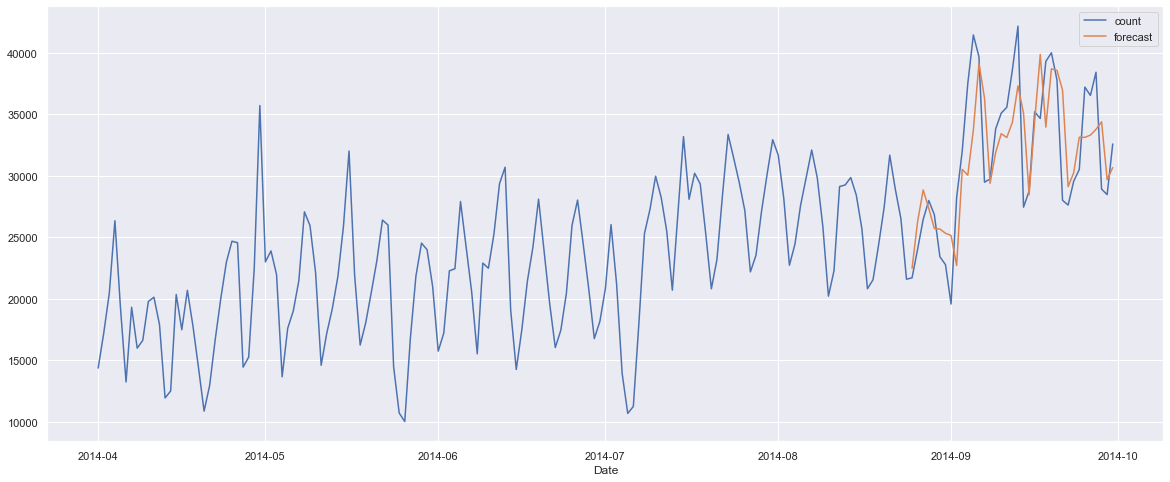

In [55]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(test_df['count'],order=(1,1,1),seasonal_order=(1,1,1,24))
results=model.fit()
print(results.summary())
test_df['forecast'] = results.predict(start=146,end=len(test_df))
test_df[['count','forecast']].plot(figsize=(20,8))

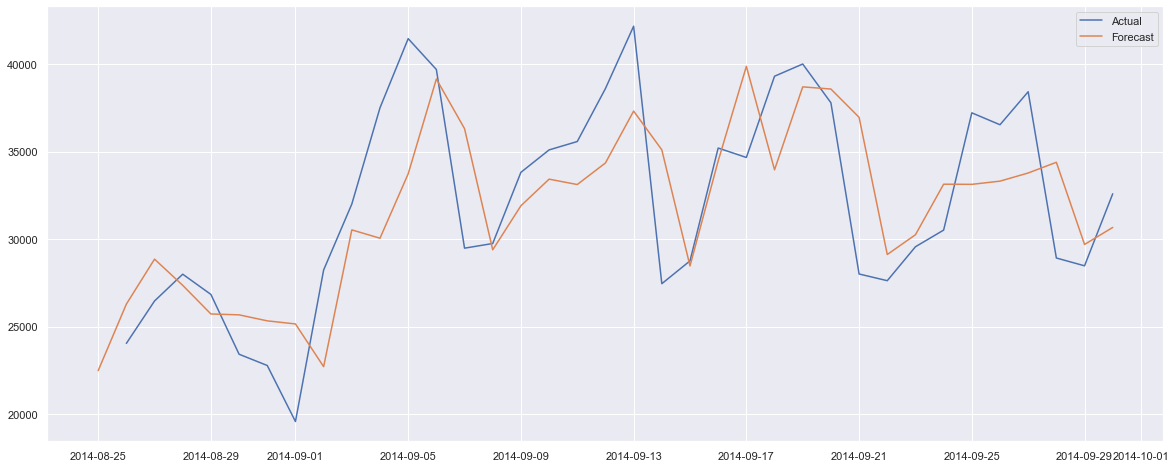

In [56]:
plt.figure(figsize=(20,8))
plt.plot(test_ts['Date/Time'], label='Actual')
plt.plot(test_df['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

Till now notes 
--

very early Saturdays see high levels of pickups (possibly due to Friday night), pickups then die down and pick up steadily into Saturday night.

Heavy increase in pickups during the month of September

Reductions in pickups during holidays

Clear difference in the distribution of hourly pickups between workdays and weekends

Misbalance in pickups between TLC bases


....BK upto you
